# Coffee Shop Sales Analysis

## Author : Khunanyu Koysakul

## Objective
This project analyzes coffee shop transaction data to understand sales performance, customer purchasing behavior, peak business hours, and product performance.

## Problem Statement

The coffee shop experiences uneven sales throughout the day, with heavy traffic in the morning and significantly lower sales in later hours.  
Additionally, customers tend to purchase only one item per visit, limiting revenue per customer.

The business needs to understand customer behavior and product performance in order to improve revenue and operational efficiency without increasing customer traffic.


## Assumptions

- Customers visiting in the morning are primarily commuters or office workers
- Afternoon customers have different purchasing intentions than morning customers
- Low average order value indicates limited upselling opportunities
- Some menu items may not significantly contribute to total revenue


## Expected Outcome

The analysis should help the business:

- Identify peak operating hours for staffing optimization
- Increase revenue per customer through bundling strategies
- Adjust menu promotion based on time of day
- Improve sales distribution across the day
- Focus on high performing products and reduce low performing items


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

In [30]:
df = pd.read_csv('coffee_shop_sales.csv')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


## Data Understanding
In this section, we explore the dataset structure, data types, and check data quality before performing analysis.

In [31]:
df.shape

(149116, 11)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [33]:
df.nunique()

transaction_id      149116
transaction_date       181
transaction_time     25762
transaction_qty          6
store_id                 3
store_location           3
product_id              80
unit_price              41
product_category         9
product_type            29
product_detail          80
dtype: int64

In [34]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [35]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


## Data Preparation
We convert date/time columns and create new features to support time-based analysis.

In [36]:
# convert date
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# convert time (correct way)
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')

In [37]:
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day
df['hour'] = df['transaction_time'].dt.hour
df['day_of_week'] = df['transaction_date'].dt.day_name()

In [38]:
df['revenue'] = df['transaction_qty'] * df['unit_price']

In [39]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month,day,hour,day_of_week,revenue
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1,1,7,Sunday,6.0
1,2,2023-01-01,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,7,Sunday,6.2
2,3,2023-01-01,1900-01-01 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1,1,7,Sunday,9.0
3,4,2023-01-01,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1,1,7,Sunday,2.0
4,5,2023-01-01,1900-01-01 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,7,Sunday,6.2


In [40]:
df[['transaction_time','hour']].head()

,transaction_time,hour
0,1900-01-01 07:06:11,7
1,1900-01-01 07:08:56,7
2,1900-01-01 07:14:04,7
3,1900-01-01 07:20:24,7
4,1900-01-01 07:22:41,7


## Peak Hour Analysis
We analyze revenue by hour to understand customer purchasing behavior and identify peak business hours.


In [41]:
hourly_sales = df.groupby('hour')['revenue'].sum().reset_index()

hourly_sales


,hour,revenue
0,6,21900.27
1,7,63526.47
2,8,82699.87
3,9,85169.53
4,10,88673.39
5,11,46319.14
6,12,40192.79
7,13,40367.45
8,14,41304.74
9,15,41733.10


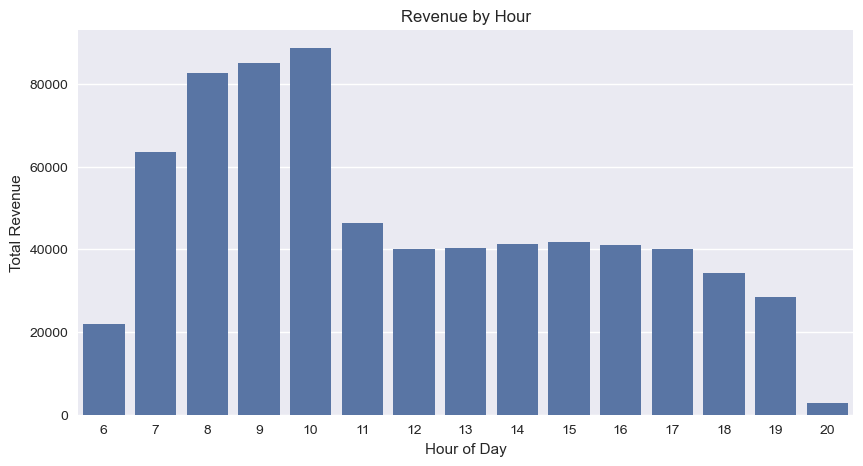

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(data=hourly_sales, x='hour', y='revenue')
plt.title('Revenue by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue')
plt.show()

Sales are highest between 8 AM and 10 AM, with the peak at 10 AM. 
This shows most customers visit the shop before starting their workday.

After 11 AM, sales drop and stay steady in the afternoon, meaning customers are less likely to buy coffee outside the morning rush.

Business Suggestion:
The shop should prepare more ingredients and schedule more staff during morning hours to serve customers faster. 
To increase afternoon sales, the shop can offer promotions or discounts during slower hours.



## Product Performance Analysis
We analyze which products generate the most revenue to understand customer preferences.


In [43]:
top_products = (
    df.groupby('product_type')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_products

,product_type,revenue
0,Barista Espresso,91406.20
1,Brewed Chai tea,77081.95
2,Hot chocolate,72416.00
3,Gourmet brewed coffee,70034.60
4,Brewed Black tea,47932.00
5,Brewed herbal tea,47539.50
6,Premium brewed coffee,38781.15
7,Organic brewed coffee,37746.50
8,Scone,36866.12
9,Drip coffee,31984.00


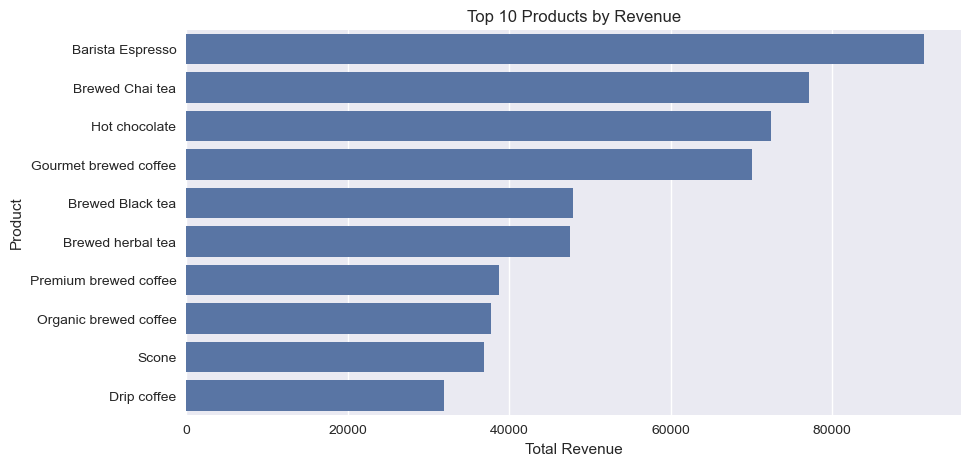

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_products, x='revenue', y='product_type')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.show()

Espresso and milk-based coffee drinks generate the highest revenue, followed by chai tea and hot chocolate.

This shows customers mainly visit the shop for core beverages rather than food items, as bakery products contribute less to total sales.

Business Suggestion:
The shop should promote its coffee menu as the main selling point and ensure fast preparation during busy hours. 
Food items like scones may benefit from bundle promotions (e.g., coffee + bakery set) to increase their sales.


## Store Location Analysis
We compare revenue across store locations to evaluate performance differences.


In [45]:
location_sales = (
    df.groupby('store_location')['revenue']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

location_sales

,store_location,revenue
0,Hell's Kitchen,236511.17
1,Astoria,232243.91
2,Lower Manhattan,230057.25


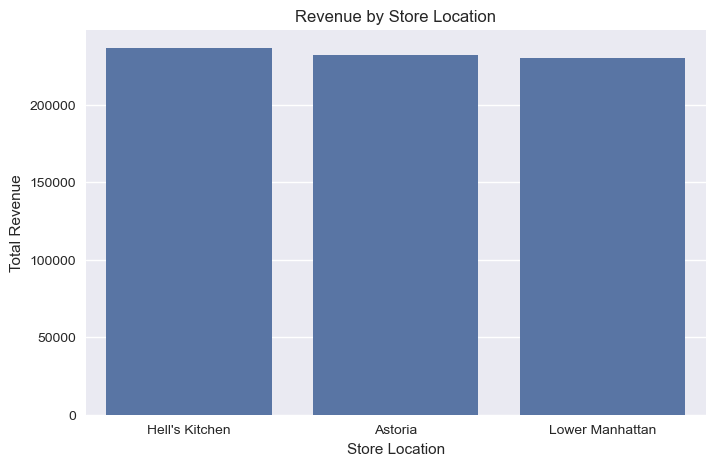

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(data=location_sales, x='store_location', y='revenue')
plt.title('Revenue by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Revenue')
plt.show()


Hell's Kitchen generates the highest revenue, while Astoria and Lower Manhattan show similar performance.

This suggests customer demand varies slightly by neighborhood rather than having a clearly weak location.

Business Suggestion:
High-performing areas like Hell's Kitchen may support store expansion or larger capacity. 
Other locations already perform consistently, so small local promotions could further improve sales without major operational changes.


## Customer Visit Pattern
We analyze sales by day of the week to understand customer visit behavior.

In [47]:
day_sales = (
    df.groupby('day_of_week')['revenue']
    .sum()
    .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    .reset_index()
)

day_sales

,day_of_week,revenue
0,Monday,101677.28
1,Tuesday,99455.94
2,Wednesday,100313.54
3,Thursday,100767.78
4,Friday,101373.00
5,Saturday,96894.48
6,Sunday,98330.31


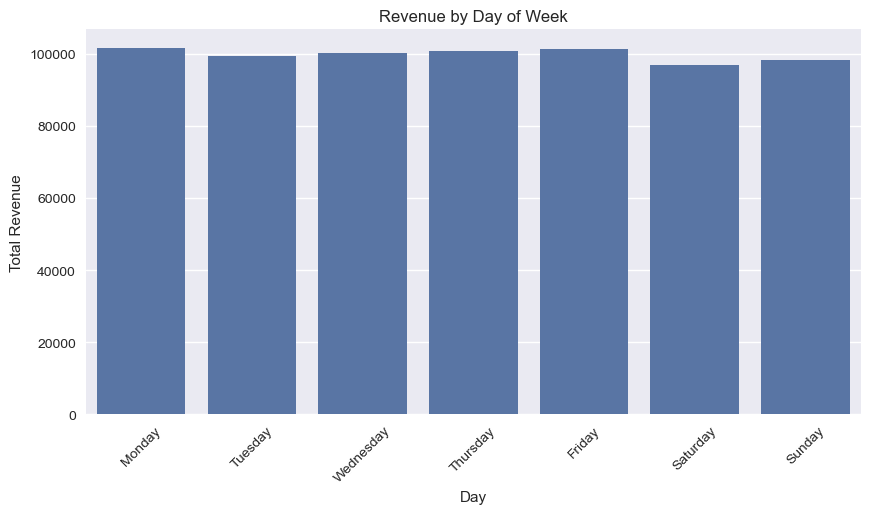

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(data=day_sales, x='day_of_week', y='revenue')
plt.title('Revenue by Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Sales remain relatively consistent throughout the week, with no significant difference between weekdays and weekends.

This indicates the coffee shop relies on regular daily customers rather than occasional weekend visitors. 
Customers likely purchase coffee as part of their routine.

Business Suggestion:
Since demand is stable across all days, the shop should focus on maintaining consistent service quality rather than heavy weekend promotions. 
Loyalty programs or membership rewards may be more effective than short-term discounts.


## Sales Drop Analysis (Morning vs Afternoon)
We compare revenue between morning and afternoon to identify low performance periods.

In [49]:
def period(hour):
    if 6 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

df['period'] = df['hour'].apply(period)


In [50]:
period_sales = df.groupby('period')['revenue'].sum().reset_index()
period_sales

,period,revenue
0,Afternoon,251039.97
1,Evening,105802.83
2,Morning,341969.53


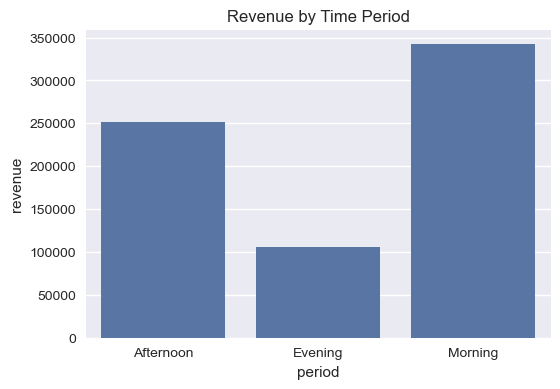

In [51]:
plt.figure(figsize=(6,4))
sns.barplot(data=period_sales, x='period', y='revenue')
plt.title('Revenue by Time Period')
plt.show()


Revenue is highly concentrated in the morning, while afternoon sales drop significantly and evening sales are very low.

This indicates the shop depends heavily on morning commuters and has unused capacity during later hours.

Business Recommendation:
To improve revenue distribution, the shop should introduce time-based promotions such as afternoon discounts or evening special menus (e.g., iced drinks or dessert combos). 
This can attract new customer groups and better utilize store capacity throughout the day.


## Revenue Contribution Analysis (Beverage vs Food)
We analyze how much each product category contributes to total revenue to identify sales opportunities.


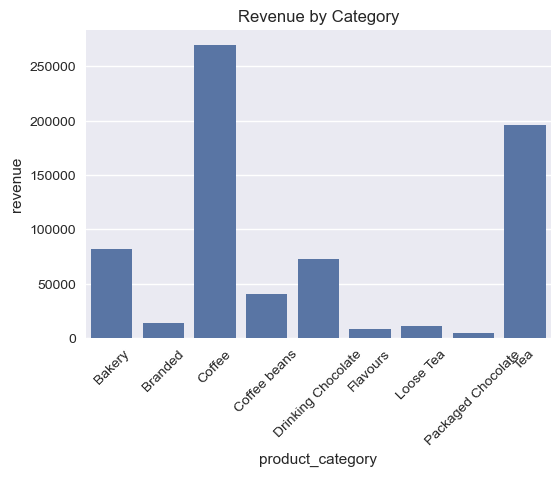

In [52]:
category_sales = df.groupby('product_category')['revenue'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=category_sales, x='product_category', y='revenue')
plt.xticks(rotation=45)
plt.title('Revenue by Category')
plt.show()

Coffee products generate the majority of revenue, followed by packaged chocolate and bakery items. 
Other categories such as flavours, branded items, and loose tea contribute very little to total sales.

This shows customers mainly visit the shop for core drink items rather than specialty or retail products.

Business Recommendation:
The shop should focus on promoting high-demand beverages and consider simplifying the menu by removing low-performing items. 
Additionally, pairing drinks with bakery items as a set menu could increase the average order value.


## Customer Spending Analysis (Average Order Value)
We analyze how much customers spend per visit to identify opportunities to increase revenue per order.


In [53]:
order_value = df.groupby('transaction_id')['revenue'].sum()

aov = order_value.mean()
aov

np.float64(4.6863671906435265)

The average order value is approximately $4.69, indicating most customers purchase only a single beverage per visit.

Business Recommendation:
The shop can increase revenue per customer by introducing bundle deals such as coffee + bakery sets or small discounts for purchasing multiple items.


In [54]:
items_per_order = df.groupby('transaction_id')['transaction_qty'].sum().mean()
items_per_order

np.float64(1.438276241315486)

Customers purchase an average of 1.4 items per transaction, confirming that most visits involve buying only one product.

Business Recommendation:
Encourage multi-item purchases by offering bundle promotions, upselling at the counter, or small discounts for adding a second item.

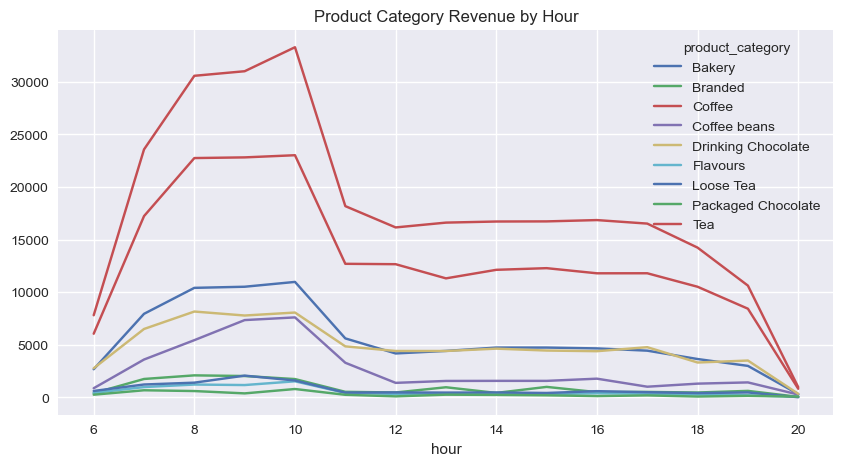

In [55]:
hour_product = (
    df.groupby(['hour','product_category'])['revenue']
    .sum()
    .reset_index()
)

pivot = hour_product.pivot(index='hour', columns='product_category', values='revenue').fillna(0)
pivot.plot(figsize=(10,5))
plt.title("Product Category Revenue by Hour")
plt.show()

Coffee sales dominate during morning hours, especially between 7 AM and 10 AM. 
After midday, coffee demand decreases while tea and chocolate beverages become relatively more popular.

This shows customer preferences change throughout the day rather than remaining constant.

Business Recommendation:
The shop should highlight hot coffee and quick-service drinks during morning hours for faster service. 
In the afternoon and evening, promote tea, chocolate drinks, and sweet items to match customer preferences and increase sales.

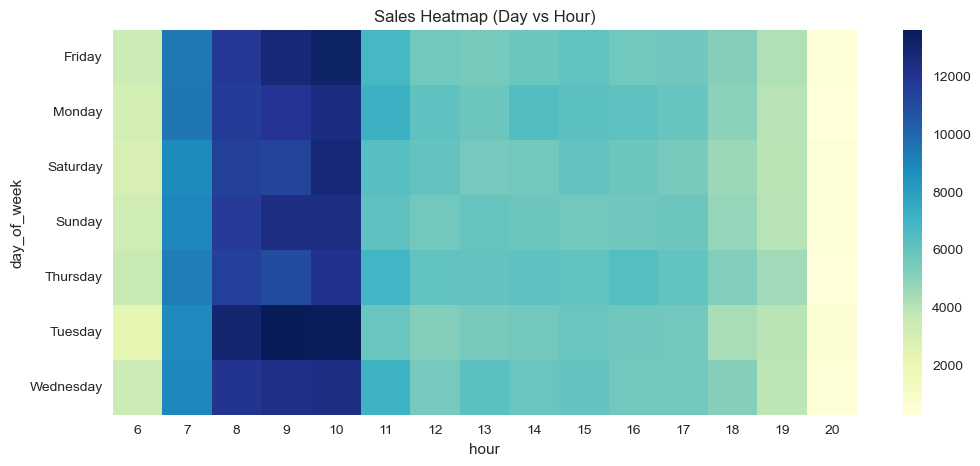

In [56]:
heatmap_data = df.pivot_table(values='revenue', index='day_of_week', columns='hour', aggfunc='sum')

plt.figure(figsize=(12,5))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Sales Heatmap (Day vs Hour)")
plt.show()

Sales activity is concentrated at specific hours rather than specific days, with a consistent peak between 8 AM and 10 AM across all days of the week.

This indicates customer demand is driven by daily routines (morning commute) rather than weekend leisure behavior.

Business Recommendation:
Staff scheduling should be optimized by hour instead of by day. 
More employees should be assigned during morning peak hours, while staffing can be reduced in the evening to improve labor cost efficiency.


## Executive Summary

This project analyzes coffee shop transaction data to understand customer behavior, product performance, and operational efficiency.

Key Findings:

1. Morning Peak Demand  
Sales consistently peak between 8 AM and 10 AM across all days, showing the business depends on daily commuting customers rather than weekend traffic.

2. Low Revenue per Customer  
The average order value is approximately $4.69 and customers purchase about 1.4 items per visit, indicating most customers buy only one drink per visit.

3. Product Focus  
Coffee beverages generate the majority of revenue, while many secondary product categories contribute very little.

4. Time-Based Preference  
Customers prefer coffee in the morning and shift toward tea or sweet drinks later in the day.

5. Demand Imbalance  
Revenue drops significantly after 11 AM and remains low in the evening, meaning store capacity is underutilized for a large part of the day.

Business Recommendations:

- Increase staffing and preparation speed during morning peak hours
- Introduce bundle promotions (drink + bakery) to increase average order value
- Promote different menu items based on time of day
- Apply afternoon promotions to improve sales distribution
- Optimize staff scheduling by hour to reduce labor costs
- Simplify low-performing menu items and focus on core products

Overall, the coffee shop operates as a routine driven business.  
Improving upselling strategies and balancing demand across the day would significantly increase revenue without requiring additional customer traffic.
